## Experimenting with distance analysis in python

In [1]:
"""
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, morphology, measure
import cv2 as cv
import skimage as ski
import time
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.measure import label, regionprops, regionprops_table
import pandas as pd
import squidpy as sq
from numpy.random import default_rng
import scanpy as sc
import squidpy as sq
from anndata import AnnData
from statistics import mean
""";


In [2]:
# Read the image and segmentation mask
image = io.imread('../00_Data/PP_Images/R1B1ROI1/C-000_S-000_S_DAPI_R-01_W-B-1_ROI-01_A-DAPI.tif')
mask = io.imread('../02_Segmentation/FinalNucleiCytoSeg/R1B1ROI1_NucleiCytoSegmentationV2.tif')

actin = io.imread('../00_Data/PP_Images/R1B1ROI1/C-011_S-000_S_FITC_R-01_W-B-1_ROI-01_A-Actin_C-REAL650.tif')
cytokeratin = io.imread('../00_Data/PP_Images/R1B1ROI1/C-008_S-000_S_FITC_R-01_W-B-1_ROI-01_A-Cytokeratin_C-REA831.tif')
cd45 = io.imread('../00_Data/PP_Images/R1B1ROI1/C-001_S-000_S_APC_R-01_W-B-1_ROI-01_A-CD45_C-AF647.tif')
fibulin2 = io.imread('../00_Data/PP_Images/R1B1ROI1/C-001_S-000_S_FITC_R-01_W-B-1_ROI-01_A-Fibulin2_C-FITC.tif')
lyve1 = io.imread('../00_Data/PP_Images/R1B1ROI1/C-005_S-000_S_FITC_R-01_W-B-1_ROI-01_A-LYVE1_C-REAL1161.tif')
cd4 = io.imread('../00_Data/PP_Images/R1B1ROI1/C-006_S-000_S_PE_R-01_W-B-1_ROI-01_A-CD4_C-REA1307.tif')
cd45ro = io.imread('../00_Data/PP_Images/R1B1ROI1/C-009_S-000_S_APC_R-01_W-B-1_ROI-01_A-CD45RO_C-REA611.tif')
podoplanin = io.imread('../00_Data/PP_Images/R1B1ROI1/C-009_S-000_S_PE_R-01_W-B-1_ROI-01_A-Podoplanin_C-REA446.tif')
cd3 = io.imread('../00_Data/PP_Images/R1B1ROI1/C-010_S-000_S_FITC_R-01_W-B-1_ROI-01_A-CD3_C-REA1151.tif')
collageni = io.imread('../00_Data/PP_Images/R1B1ROI1/C-012_S-000_S_APC_R-01_W-B-1_ROI-01_A-CollagenI_C-REAL958.tif')





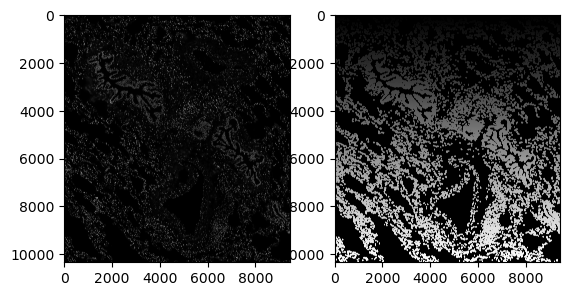

In [3]:
# visualising image and mask
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image, cmap="gray");
axarr[1].imshow(mask, cmap="gray");

In [4]:
mask.shape

(10338, 9432)

In [87]:
len(regions) # THERE SHOULD BE 11734 WHY ARE THERE 10 EXTRA ??

11744

In [5]:
properties = [ "area", "bbox", "centroid_local","convex_area","bbox_area", "extent",  
              "coords", "solidity", "eccentricity", 
              "orientation" ]
segmentation_table = pd.DataFrame(regionprops_table(mask, 
             properties=properties))


In [6]:
properties = [ "area", "bbox", "centroid_local","convex_area","bbox_area", "extent",  
              "coords", "solidity", "eccentricity", 
              "orientation", "intensity_mean"]
actin_table = pd.DataFrame(regionprops_table(mask, actin, properties=properties))

In [7]:
properties = [ "area", "bbox", "centroid_local","convex_area","bbox_area", "extent",  
              "coords", "solidity", "eccentricity", 
              "orientation", "intensity_mean"]
cytokeratin_table = pd.DataFrame(regionprops_table(mask, cytokeratin, properties=properties))

In [470]:
actin_table

,area,bbox-0,bbox-1,bbox-2,bbox-3,centroid_local-0,centroid_local-1,convex_area,bbox_area,extent,coords,solidity,eccentricity,orientation,intensity_mean
0,854.0,0,0,24,45,9.217799,23.176815,902.0,1080.0,0.790741,"[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5...",0.946785,0.886788,1.478187,1646.274005
1,2829.0,0,157,48,228,21.315659,37.078119,2858.0,3408.0,0.830106,"[[0, 157], [0, 158], [0, 159], [0, 160], [0, 1...",0.989853,0.752505,1.288856,1657.864970
2,3012.0,0,266,45,346,19.198207,39.499668,3028.0,3600.0,0.836667,"[[0, 266], [0, 267], [0, 268], [0, 269], [0, 2...",0.994716,0.812706,-1.568179,1555.305113
3,1819.0,0,638,47,697,17.492029,30.349643,1912.0,2773.0,0.655968,"[[0, 638], [0, 639], [0, 640], [0, 641], [0, 6...",0.951360,0.635684,1.117380,1683.058824
4,2130.0,0,2030,40,2109,15.444131,31.602817,2198.0,3160.0,0.674051,"[[0, 2030], [0, 2031], [0, 2032], [0, 2033], [...",0.969063,0.845836,-1.373224,2024.990141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11729,1533.0,10301,8491,10338,8559,23.647750,39.621005,1666.0,2516.0,0.609300,"[[10301, 8539], [10302, 8538], [10302, 8539], ...",0.920168,0.891212,-1.353189,1373.705806
11730,1561.0,10307,8955,10338,9030,19.335682,38.210122,1784.0,2325.0,0.671398,"[[10307, 8974], [10308, 8973], [10308, 8974], ...",0.875000,0.938801,1.544158,1388.690583
11731,1099.0,10315,5625,10338,5688,13.585987,33.414923,1181.0,1449.0,0.758454,"[[10315, 5686], [10316, 5684], [10316, 5685], ...",0.930567,0.956031,-1.504417,1300.159236
11732,2717.0,10298,5687,10338,5766,21.609128,36.713287,2760.0,3160.0,0.859810,"[[10298, 5699], [10298, 5700], [10298, 5701], ...",0.984420,0.868503,1.461181,1292.217151


In [450]:
actin_table["intensity_mean"].shape
centroids.shape

(11734, 2)

In [461]:
averagesdf["actin"]

0        1651.465
1        1653.853
2        1554.097
3        1682.044
4        1766.929
           ...   
11729    1376.105
11730    1388.308
11731    1147.129
11732    1372.204
11733    1299.952
Name: actin, Length: 11734, dtype: float64

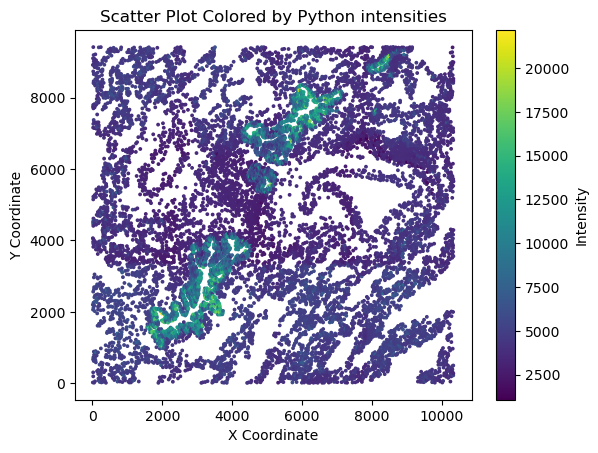

In [478]:
intensities_python = cytokeratin_table["intensity_mean"]
intensities_fiji = averagesdf["cytokeratin"]

x = centroids[:, 0]
y = centroids[:, 1]

# Create the scatter plot
plt.scatter(x, y, c=intensities_python, cmap='viridis', s=3)  # s is the marker size

# Add a color bar
plt.colorbar(label='Intensity')

# Label axes
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot Colored by Python intensities')

# Show plot
plt.show()


In [23]:
segmentation_table

,area,bbox-0,bbox-1,bbox-2,bbox-3,centroid_local-0,centroid_local-1,convex_area,bbox_area,extent,coords,solidity,eccentricity,orientation,intensity_mean
0,854.0,0,0,24,45,9.217799,23.176815,902.0,1080.0,0.790741,"[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5...",0.946785,0.886788,1.478187,1.0
1,2829.0,0,157,48,228,21.315659,37.078119,2858.0,3408.0,0.830106,"[[0, 157], [0, 158], [0, 159], [0, 160], [0, 1...",0.989853,0.752505,1.288856,2.0
2,3012.0,0,266,45,346,19.198207,39.499668,3028.0,3600.0,0.836667,"[[0, 266], [0, 267], [0, 268], [0, 269], [0, 2...",0.994716,0.812706,-1.568179,3.0
3,1819.0,0,638,47,697,17.492029,30.349643,1912.0,2773.0,0.655968,"[[0, 638], [0, 639], [0, 640], [0, 641], [0, 6...",0.951360,0.635684,1.117380,4.0
4,3357.0,0,685,51,766,23.722669,40.517724,3517.0,4131.0,0.812636,"[[0, 697], [0, 698], [0, 699], [0, 700], [0, 7...",0.954507,0.768652,-1.499089,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11739,1533.0,10301,8491,10338,8559,23.647750,39.621005,1666.0,2516.0,0.609300,"[[10301, 8539], [10302, 8538], [10302, 8539], ...",0.920168,0.891212,-1.353189,11730.0
11740,1561.0,10307,8955,10338,9030,19.335682,38.210122,1784.0,2325.0,0.671398,"[[10307, 8974], [10308, 8973], [10308, 8974], ...",0.875000,0.938801,1.544158,11731.0
11741,1829.0,10309,3522,10338,3598,15.792236,37.537452,1840.0,2204.0,0.829855,"[[10309, 3548], [10309, 3549], [10309, 3550], ...",0.994022,0.915565,-1.568886,11734.0
11742,1506.0,10311,4256,10338,4325,15.320717,35.773572,1649.0,1863.0,0.808374,"[[10311, 4319], [10311, 4320], [10312, 4317], ...",0.913281,0.939993,-1.527896,11729.0


In [ ]:
# Filtering

In [386]:
segmentation_table.sort_values(by="area")

,area,bbox-0,bbox-1,bbox-2,bbox-3,centroid_local-0,centroid_local-1,convex_area,bbox_area,extent,coords,solidity,eccentricity,orientation,intensity_mean
5853,1.0,5082,5912,5083,5913,0.000000,0.000000,1.0,1.0,1.000000,"[[5082, 5912]]",1.000000,0.000000,-0.785398,5828.0
4377,1.0,3925,3532,3926,3533,0.000000,0.000000,1.0,1.0,1.000000,"[[3925, 3532]]",1.000000,0.000000,-0.785398,4310.0
6049,1.0,5236,6674,5237,6675,0.000000,0.000000,1.0,1.0,1.000000,"[[5236, 6674]]",1.000000,0.000000,-0.785398,6034.0
4286,1.0,3852,5357,3853,5358,0.000000,0.000000,1.0,1.0,1.000000,"[[3852, 5357]]",1.000000,0.000000,-0.785398,4203.0
5659,1.0,4949,5865,4950,5866,0.000000,0.000000,1.0,1.0,1.000000,"[[4949, 5865]]",1.000000,0.000000,-0.785398,5622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,8884.0,1776,5217,1904,5340,70.517785,55.175259,9675.0,15744.0,0.564278,"[[1776, 5230], [1776, 5231], [1776, 5232], [17...",0.918243,0.897481,0.765564,1753.0
1271,8953.0,1294,3181,1392,3293,47.527086,54.609516,9009.0,10976.0,0.815689,"[[1294, 3238], [1294, 3239], [1294, 3240], [12...",0.993784,0.578879,-1.147259,1278.0
1948,8993.0,1997,7083,2083,7236,41.767708,75.730123,9422.0,13158.0,0.683463,"[[1997, 7106], [1997, 7107], [1997, 7108], [19...",0.954468,0.911477,1.268341,1953.0
1509,10133.0,1532,6040,1676,6167,71.568835,62.045594,10399.0,18288.0,0.554079,"[[1532, 6057], [1532, 6058], [1532, 6059], [15...",0.974421,0.916295,0.703738,1511.0


In [397]:
len(segmentation_table[segmentation_table["area"] < 100])

10

In [118]:
len(my_table["coords"][0])


854

In [97]:
seg = segmentation_table.iloc[:-10]
len(seg)

11734

In [21]:
# Measure actin
properties = [ "area", "bbox", "centroid_local","convex_area","bbox_area", "extent",  
              "coords", "solidity", "eccentricity", 
              "orientation", "intensity_mean"]
actin_table = pd.DataFrame(regionprops_table(label_im, actin, 
             properties=properties))

In [ ]:
actin_table


 # Squidpy & Anndata

In [8]:
# Get pixel centroids from table
def centroidnp(arr): # function works row-by-row to get centroid coords from coord pixel array
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    coords = sum_x/length, sum_y/length
    return np.asarray(coords)

# Apply to all rows in data frame
centroids = segmentation_table["coords"].apply(centroidnp)
centroids = np.vstack(centroids) # stack so that it's one numpy array

In [9]:
# Get diameter

In [10]:
# Load in averages and celltypes data frames
averagesdf = pd.read_csv("averages_df.csv")
averagesdf = averagesdf.iloc[: , 1:] # drop first column, it's just the cell index
celltypesdf = pd.read_csv("celltypes_df.csv")

# Make into arrays
averages_array = averagesdf.to_numpy()
celltypes_array = celltypesdf["InferredCellType"].to_numpy()

In [11]:
np.unique(celltypes_array)

array(['Epithelial cells', 'Extracellular matrix', 'Lymphatic vessel',
       'Mixed', 'Myocytes', 'Other', 'T-cells CD4+ (helper)',
       'T-cells Mixed', 'T-cells Naive'], dtype=object)

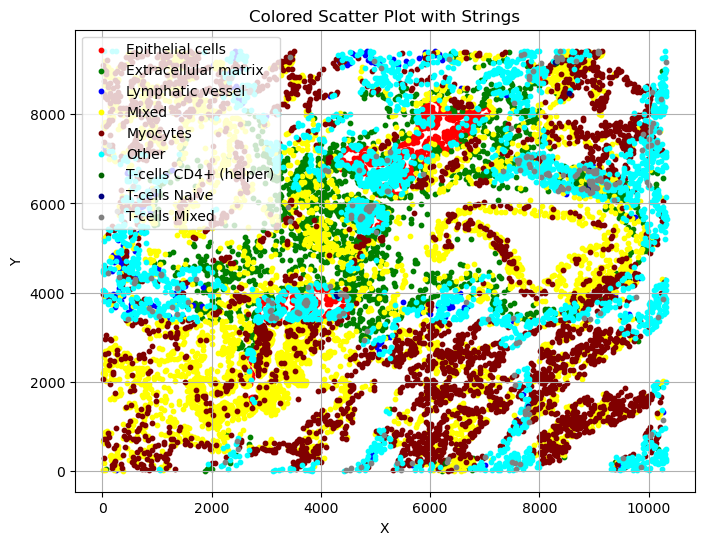

In [16]:
# Show celltypes
color_mapping = {
    "Epithelial cells": "red",     
    "Extracellular matrix": "green",
    "Lymphatic vessel": "blue",
    "Mixed": "yellow",
    "Myocytes": "maroon",
    "Other": "cyan",
    #"T-cells": "magenta",
    "T-cells CD4+ (helper)": "darkgreen",
    "T-cells Naive": "navy",
    "T-cells Mixed": "gray" }



colors = [color_mapping[string] for string in celltypes_array]

# Plot the coordinates with colors
plt.figure(figsize=(8, 6))
for string, color in color_mapping.items():
    indices = np.where(celltypes_array == string)[0]
    plt.scatter(centroids[indices, 0], centroids[indices, 1], c=color, label=string, s=10)  # Adjust the point size here

#plt.scatter(centroids[:, 0], centroids[:, 1], c=colors, s=15)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Colored Scatter Plot with Strings')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
### Investigating data ###

print(celltypesdf.head()) # Head, also useful for showing colnames
print(len(celltypesdf)) # Row num
averages_array.shape

   Unnamed: 0  actin  cd3  cd4  cd45  cd45ro  collageni  cytokeratin  \
0           1      1    0    0     0       0          0            0   
1           2      1    0    0     0       0          1            0   
2           3      1    0    0     0       0          0            0   
3           4      1    0    0     0       0          0            0   
4           5      1    0    0     0       0          0            0   

   fibulin2  lyve1  podoplanin InferredCellType  
0         1      0           0            Mixed  
1         1      0           0            Mixed  
2         0      0           0         Myocytes  
3         1      0           1            Mixed  
4         0      0           0         Myocytes  
11734


(11734, 10)

In [17]:
# Create AnnData object
counts = averages_array
#?image = actin

adata = AnnData(counts, obsm={"spatial" : centroids})

In [18]:
# Add different properties to anndata object
adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]
adata.var_names = averagesdf.keys()
adata.obs["cluster"] = pd.Categorical(celltypes_array)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)


/Users/fschulz/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-19 15:32:08.788367: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
#sc.pp.normalize_total(adata)
#sc.pp.log1p(adata)
#sc.pp.pca(adata)
#sc.pp.neighbors(adata)
#sc.tl.umap(adata)
#sc.tl.leiden(adata)
adata

AnnData object with n_obs × n_vars = 11734 × 10
    obs: 'cluster', 'leiden'
    uns: 'neighbors', 'leiden'
    obsm: 'spatial'
    obsp: 'distances', 'connectivities'

In [422]:
# TEST DATA
adatat = sq.datasets.slideseqv2()
adatat.obs["cluster"]

/Users/fschulz/miniforge3/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AACGTCATAATCGT             DentatePyramids
TACTTTAGCGCAGT       CA1_CA2_CA3_Subiculum
CATGCCTGGGTTCG             DentatePyramids
TCGATATGGCACAA             DentatePyramids
TTATCTGACGAAGC    Subiculum_Entorhinal_cl2
                            ...           
CACCCGATGACTCC             Polydendrocytes
CTTGATTAGGCAGG                Interneurons
GAGTTCCTAAGCGG             DentatePyramids
GCGCTCAGTGCTCT                Interneurons
GAGATAACAGTTCC                  Astrocytes
Name: cluster, Length: 41786, dtype: category
Categories (14, object): ['Astrocytes', 'CA1_CA2_CA3_Subiculum', 'DentatePyramids', 'Endothelial_Stalk', ..., 'Oligodendrocytes', 'Polydendrocytes', 'Subiculum_Entorhinal_cl2', 'Subiculum_Entorhinal_cl3']

#### Ripley's L statistic

ERROR: Unable to fetch palette, reason: 'cluster_colors'. Using `None`.


/Users/fschulz/miniforge3/lib/python3.10/site-packages/squidpy/pl/_graph.py:308: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(y="stats", x="bins", ci="sd", alpha=0.01, color="gray", data=res["sims_stat"], ax=ax)


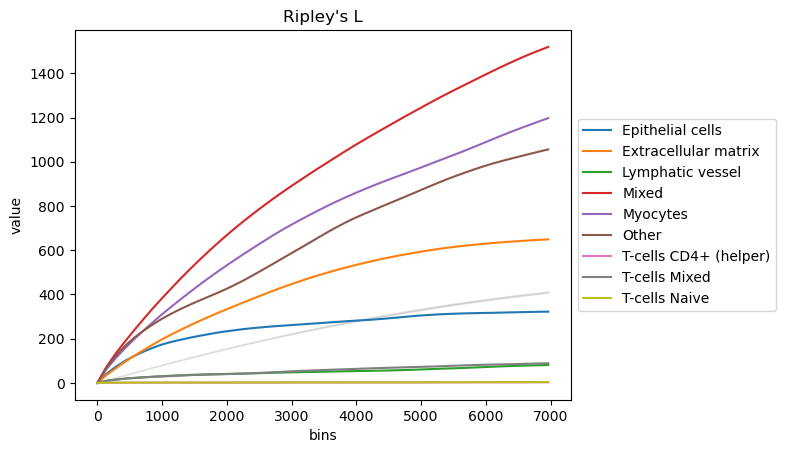

In [20]:
mode = "L"
sq.gr.ripley(adata, cluster_key="cluster", mode=mode)
sq.pl.ripley(adata, cluster_key="cluster", mode=mode)

Visualise tissue organization in spatial coordinates

/Users/fschulz/miniforge3/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


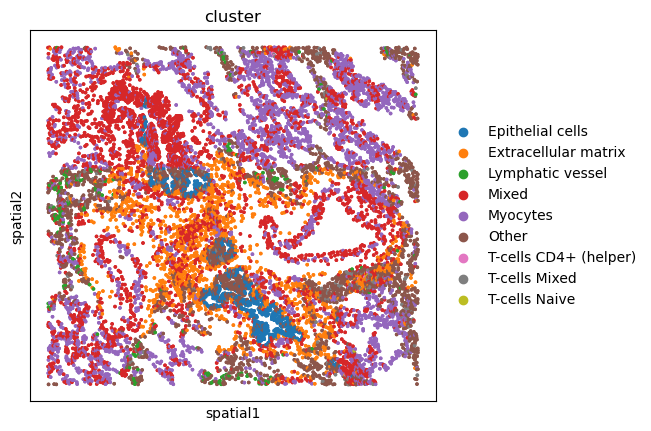

In [21]:
sq.pl.spatial_scatter(adata, color="cluster", size=10, shape=None)

#### Moran's I score

In [22]:
adatatest = sq.datasets.visium_hne_adata()
adatatest

/Users/fschulz/miniforge3/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [408]:
testset = sq.datasets.four_i()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 173M/173M [00:19<00:00, 9.26MB/s]
/Users/fschulz/miniforge3/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/fschulz/miniforge3/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [414]:
testset.uns

{'cluster_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
        '#e377c2', '#b5bd61', '#17becf', '#aec7e8'], dtype=object),
 'leiden': {'params': {'n_iterations': -1,
   'random_state': 0,
   'resolution': 1}},
 'leiden_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
        '#e377c2', '#b5bd61', '#17becf', '#aec7e8'], dtype=object),
 'neighbors': {'connectivities_key': 'connectivities',
  'distances_key': 'distances',
  'params': {'method': 'umap', 'metric': 'euclidean', 'n_neighbors': 15}},
 'pca': {'params': {'use_highly_variable': False, 'zero_center': True},
  'variance': array([13.80774128,  3.66007134,  1.58638194,  1.21603362,  1.03436673,
          0.94218409,  0.91654402,  0.88766871,  0.88159649,  0.86974117,
          0.86391988,  0.85453364,  0.84490485,  0.81271055,  0.78707152,
          0.76994369,  0.75875105,  0.7141553 ,  0.69368144,  0.66664154,
          0.64464635,  0.62632261,  0.57678826,  0.5

In [23]:
 adata.var_names.values

array(['actin', 'cd3', 'cd4', 'cd45', 'cd45ro', 'collageni',
       'cytokeratin', 'fibulin2', 'lyve1', 'podoplanin'], dtype=object)

In [413]:
genes = testset[:, testset.var.highly_variable].var_names.values[:100]
sq.gr.spatial_neighbors(testset)
sq.gr.spatial_autocorr(
    adatatest,
    mode="moran",
    genes=genes,
    n_perms=100,
    n_jobs=1,
)
testset.uns["moranI"].head(10)

AttributeError: 'DataFrame' object has no attribute 'highly_variable'

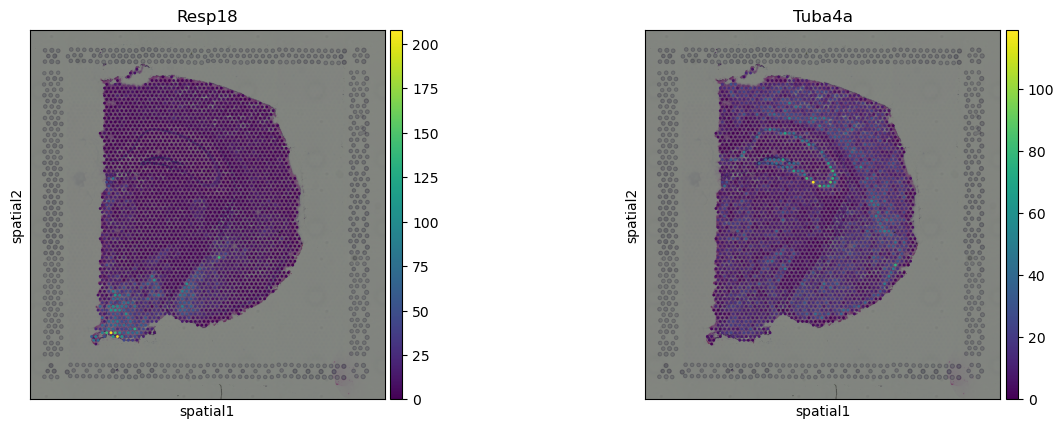

In [305]:
sq.pl.spatial_scatter(adatatest, color=["Resp18", "Tuba4a"])

In [296]:
markers = adata.var_names.values
sq.gr.spatial_neighbors(adata)
sq.gr.spatial_autocorr(
    adata,
    mode="moran",
    genes=markers,
    n_perms=100,
    n_jobs=1,
)




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.89/s]


In [25]:
adata.uns["moranI"].head(10)

KeyError: 'moranI'

In [399]:
adata.uns

OrderedDict([('neighbors',
              {'connectivities_key': 'connectivities',
               'distances_key': 'distances',
               'params': {'n_neighbors': 15,
                'method': 'umap',
                'random_state': 0,
                'metric': 'euclidean'}}),
             ('leiden',
              {'params': {'resolution': 1,
                'random_state': 0,
                'n_iterations': -1}}),
             ('spatial_neighbors',
              {'connectivities_key': 'spatial_connectivities',
               'distances_key': 'spatial_distances',
               'params': {'n_neighbors': 8,
                'coord_type': 'grid',
                'radius': None,
                'transform': None}}),
             ('moranI',
                                  I     pval_norm  var_norm    pval_z_sim  pval_sim  \
              lyve1        0.319395  0.000000e+00  0.000029  0.000000e+00  0.009901   
              cd3          0.292246  0.000000e+00  0.000029  0.000000e+00  

In [407]:
adatatest.uns["spatial"]

{'V1_Adult_Mouse_Brain': {'images': {'hires': array([[[0.50980395, 0.52156866, 0.49411765],
           [0.50980395, 0.5176471 , 0.49411765],
           [0.50980395, 0.5176471 , 0.5019608 ],
           ...,
           [0.5019608 , 0.5137255 , 0.49019608],
           [0.5019608 , 0.5137255 , 0.49803922],
           [0.5019608 , 0.50980395, 0.49411765]],
   
          [[0.50980395, 0.5176471 , 0.49803922],
           [0.5137255 , 0.52156866, 0.49411765],
           [0.50980395, 0.5176471 , 0.49803922],
           ...,
           [0.49803922, 0.5137255 , 0.4862745 ],
           [0.49803922, 0.50980395, 0.49411765],
           [0.5019608 , 0.5137255 , 0.5019608 ]],
   
          [[0.5058824 , 0.5176471 , 0.49019608],
           [0.5137255 , 0.52156866, 0.5019608 ],
           [0.5058824 , 0.52156866, 0.5019608 ],
           ...,
           [0.5019608 , 0.5137255 , 0.49803922],
           [0.5019608 , 0.50980395, 0.49411765],
           [0.5058824 , 0.5137255 , 0.49803922]],
   
          ..

In [375]:
sq.pl.spatial_scatter(adata, color=["actin", "podoplanin"])

KeyError: "Spatial key 'spatial' not found in `adata.uns`."

#### Spatial neighbours graph

In [323]:
adata

AnnData object with n_obs × n_vars = 11734 × 10
    obs: 'cluster', 'leiden'
    uns: 'neighbors', 'leiden', 'spatial_neighbors', 'moranI'
    obsm: 'spatial'
    obsp: 'distances', 'connectivities', 'spatial_connectivities', 'spatial_distances'

In [325]:
sq.gr.spatial_neighbors(adata, n_rings=2, coord_type="grid", n_neighs=4)

In [326]:
adata.obsp["spatial_connectivities"]

<11734x11734 sparse matrix of type '<class 'numpy.float64'>'
	with 82044 stored elements in Compressed Sparse Row format>

In [327]:
adata.obsp["spatial_distances"]

<11734x11734 sparse matrix of type '<class 'numpy.float64'>'
	with 82044 stored elements in Compressed Sparse Row format>

In [328]:
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx, :],
    connectivity_key="spatial_connectivities",
    img=False,
    na_color="lightgrey",
)

KeyError: "Spatial key 'spatial' not found in `adata.uns`."

KeyError: 'Could not find key cell type in .var_names or .obs.columns.'

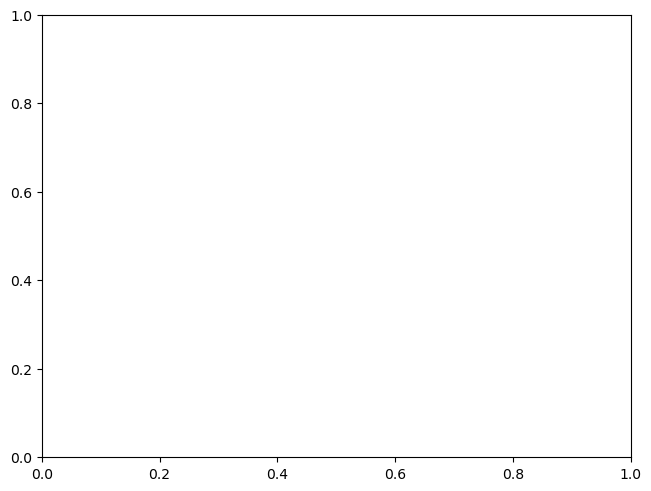

In [350]:
sq.gr.spatial_neighbors(adata, spatial_key="spatial", n_neighs=8, coord_type="grid")
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx, :],
    shape=None,
    color="cell type",
    connectivity_key="spatial_connectivities",
    size=100,
)

In [351]:
idx

array([329, 349, 359, 412, 417, 424, 446, 471, 480, 483, 549, 420])

In [340]:
adatatest2 = sq.datasets.visium_fluo_adata()

/Users/fschulz/miniforge3/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [ ]:
## adatatest2


In [342]:
sq.gr.spatial_neighbors(adatatest2, n_rings=2, coord_type="grid", n_neighs=6)

In [343]:
adatatest2

AnnData object with n_obs × n_vars = 2800 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap', 'spatial_neighbors'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [373]:
adatatest2.obsp["spatial_connectivities"]

<2800x2800 sparse matrix of type '<class 'numpy.float64'>'
	with 48240 stored elements in Compressed Sparse Row format>

In [345]:
adatatest2.obsp["spatial_distances"]

<2800x2800 sparse matrix of type '<class 'numpy.float64'>'
	with 48240 stored elements in Compressed Sparse Row format>

In [346]:
adata.obsp["spatial_distances"]

<11734x11734 sparse matrix of type '<class 'numpy.float64'>'
	with 67511 stored elements in Compressed Sparse Row format>

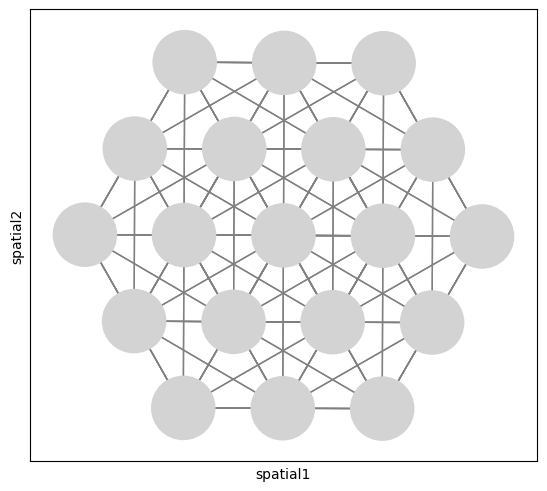

In [348]:
_, idx = adatatest2.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adatatest2[idx, :],
    connectivity_key="spatial_connectivities",
    img=False,
    na_color="lightgrey",
)

In [374]:
adata

AnnData object with n_obs × n_vars = 11734 × 10
    obs: 'cluster', 'leiden'
    uns: 'neighbors', 'leiden', 'spatial_neighbors', 'moranI'
    obsm: 'spatial'
    obsp: 'distances', 'connectivities', 'spatial_connectivities', 'spatial_distances'

/Users/fschulz/miniforge3/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


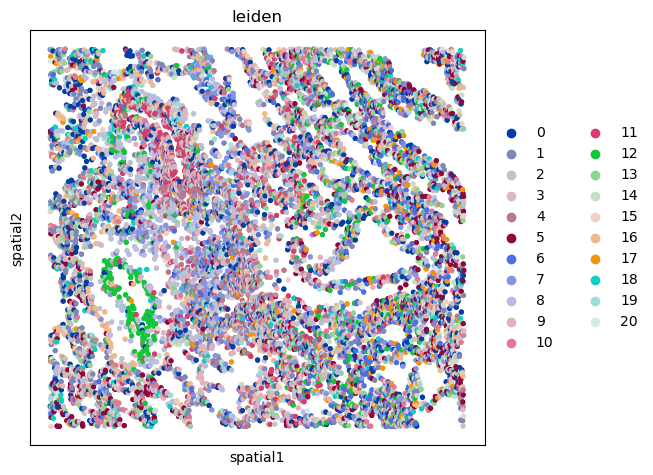

In [218]:
sq.gr.spatial_neighbors(adata, radius=3.0)
sq.pl.spatial_scatter(
    adata,
    color="leiden",
    connectivity_key="spatial_connectivities",
    edges_color="black",
    shape=None,
    edges_width=1,
    size=30,
)

In [220]:
adata

AnnData object with n_obs × n_vars = 11734 × 10
    obs: 'leiden'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'spatial_neighbors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities', 'spatial_connectivities', 'spatial_distances'

In [196]:
sq.gr.spatial_autocorr(adata, mode="moran")
num_view = 12
top_autocorr = (
    adata.uns["moranI"]["I"].sort_values(ascending=False).head(num_view).index.tolist()
)
bot_autocorr = (
    adata.uns["moranI"]["I"].sort_values(ascending=True).head(num_view).index.tolist()
)

/Users/fschulz/miniforge3/lib/python3.10/site-packages/squidpy/gr/_ppatterns.py:491: RuntimeWarning: invalid value encountered in scalar divide
  Vscore_norm = v_num / v_den - (1.0 / (n - 1)) ** 2


In [201]:
sq.pl.spatial_scatter(
    adata, color=top_autocorr, size=20, cmap="Reds", img=False, figsize=(5, 5)
)

KeyError: "Spatial key 'spatial' not found in `adata.uns`."

In [221]:
adata.X

array([[7.40648228, 8.64264288, 6.05081051, ..., 8.02791442, 7.30100533,
        7.044629  ],
       [7.35592967, 8.62131333, 6.82881007, ..., 7.98401954, 7.24110745,
        5.40731474],
       [7.32448777, 8.71611787, 7.10267396, ..., 7.41390254, 7.24058235,
        7.11588746],
       ...,
       [7.40582873, 8.74627554, 6.57405815, ..., 7.45238749, 7.33611009,
        7.34520522],
       [7.4593081 , 8.6919695 , 6.16977507, ..., 7.27538889, 7.37444148,
        7.30927784],
       [7.40643161, 8.68038805, 6.0619539 , ..., 7.28220856, 7.32656801,
        6.3710379 ]])

In [206]:
averages_array

array([[0.63391623, 2.20454715, 2.3382049 , ..., 2.27397095, 2.19226941,
        2.1617817 ],
       [0.82741639, 2.1773966 , 2.31441506, ..., 2.24775499, 2.16398071,
        1.92091653],
       [0.96446407, 2.17258072, 2.32278235, ..., 2.18294077, 2.16276027,
        2.14798495],
       ...,
       [2.3999129 , 2.14574514, 2.30007169, ..., 2.15152395, 2.13702896,
        2.13817033],
       [2.36203067, 2.12893344, 2.26940363, ..., 2.10617614, 2.11849666,
        2.11040845],
       [2.35339421, 2.11391667, 2.25949673, ..., 2.09851934, 2.10404486,
        1.9777105 ]])

In [ ]:
# Convert segmentation mask to binary
binary_mask = segmentation_mask > 0

# Compute distance transform
distance_map = morphology.distance_transform_edt(binary_mask)

# Analyze distances
mean_distance = np.mean(distance_map)
max_distance = np.max(distance_map)
# You can perform further analysis as needed

# Visualize the distance map
plt.imshow(distance_map, cmap='viridis')
plt.colorbar(label='Distance')
plt.title('Distance Transform')
plt.show()

print("Mean Distance:", mean_distance)
print("Max Distance:", max_distance)